<a href="https://colab.research.google.com/github/patelparth507/Sentiment-Analysis-on-Hotel-Reviews/blob/main/Final_Project_DMBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

  
import re
##
import string
from nltk.corpus import stopwords

from nltk.tokenize import RegexpTokenizer
from os import path
from nltk.tokenize import word_tokenize
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
#from spellchecker import SpellChecker
from textblob import TextBlob, Word, Blobber
import plotly.tools as tls
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
#import plotly.plotly as py
from textblob import Word
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

from nltk import pos_tag
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## Reading the data

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read the data in pandas as df
df = pd.read_csv('/content/drive/Shared drives/OPIM 5671 DMBI/Final_project/tripadvisor_hotel_reviews.csv') 
df.head(10)


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [ ]:
#make a copy of the data so we have the raw data 
df_original = df.copy()

In [ ]:
# descriptive statistics of Rating
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
# checking the missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


## Data Exploration

### Adding Sentiment Column

Here, we are adding a column Sentiment by Labelling the Rating column where 1&2 Rating would be -1 (Negative Sentiment), 3 is 0 (Neutral Sentiment), and 4&5 Rating would be 1 (positive sentiment). 

In [ ]:
conditions = [(df['Rating']<3), (df['Rating']== 3), (df['Rating'] >3)]
values = [-1,0,1]

df['Sentiment'] = np.select(conditions, values)



In [ ]:
df.head(10)

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,-1
2,nice rooms not 4* experience hotel monaco seat...,3,0
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1
5,love monaco staff husband stayed hotel crazy w...,5,1
6,"cozy stay rainy city, husband spent 7 nights m...",5,1
7,"excellent staff, housekeeping quality hotel ch...",4,1
8,"hotel stayed hotel monaco cruise, rooms genero...",5,1
9,excellent stayed hotel monaco past w/e delight...,5,1


### Distribution 

In [ ]:
# checking the range of Sentiment
df.Sentiment.value_counts()

 1    15093
-1     3214
 0     2184
Name: Sentiment, dtype: int64

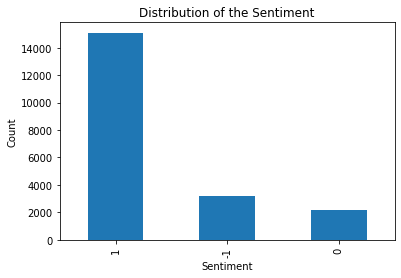

In [ ]:
df.Sentiment.value_counts().plot.bar()
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of the Sentiment')
plt.show()

# This bar chart shows that we do not have equal distribution of the ratings in our data. 

### Word Cloud

Here we are printing the kind of words which appear the most in our reviews

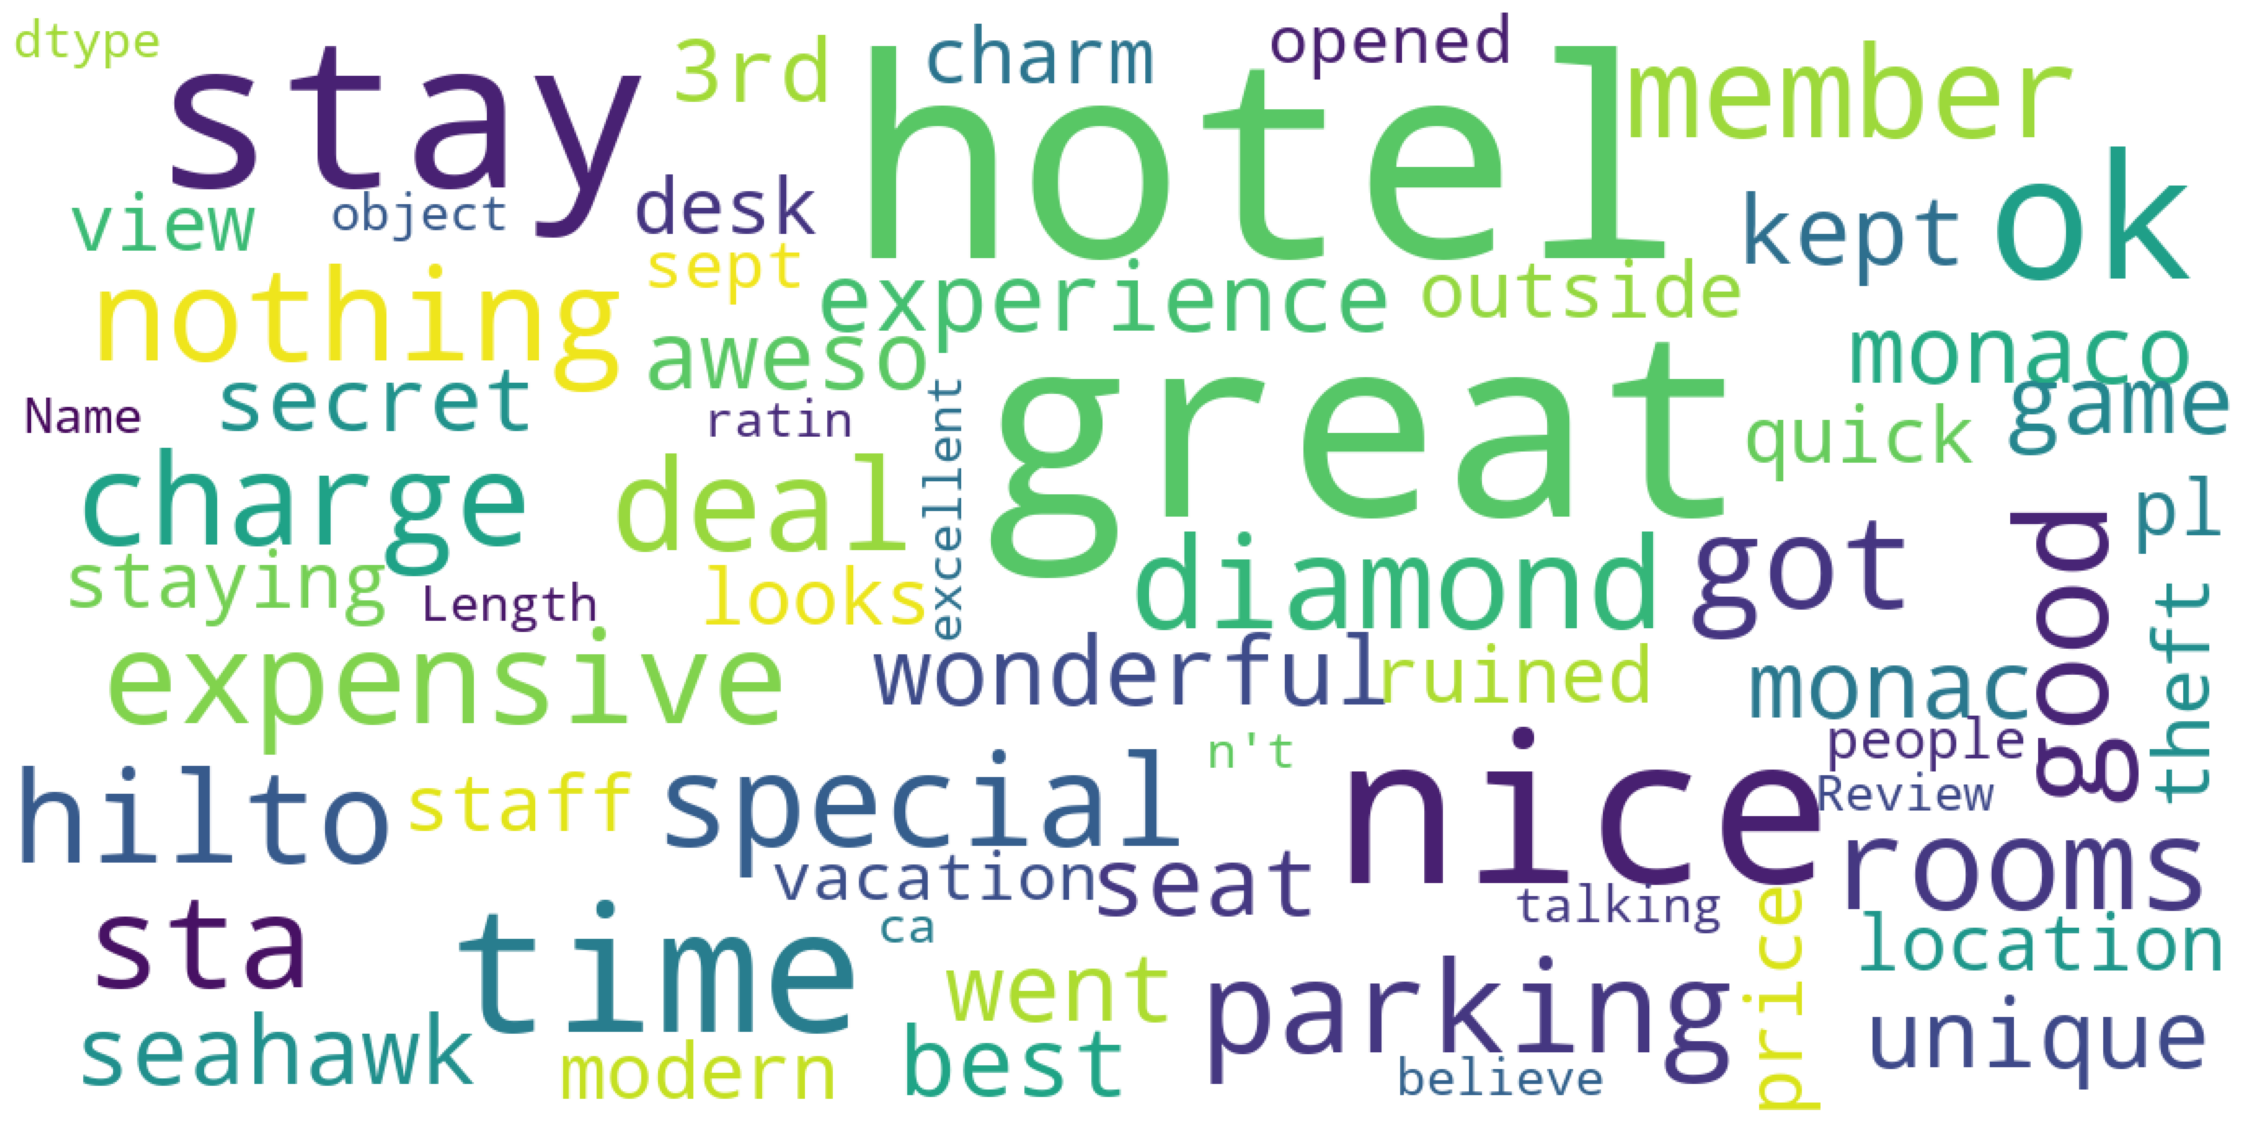

In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 1000,
        max_font_size = 50, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (40, 40))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["Review"])

#show_wordcloud(df[df['Sentiment'] == 1]['Review'])

In [ ]:
df['Sentiment Polarity'] = df['Review'].map(lambda text: TextBlob(text).sentiment.polarity)
df['Review Length'] = df['Review'].astype(str).apply(len)
df['Word Count'] = df['Review'].apply(lambda x: len(str(x).split()))

In [ ]:
df.head()

,Review,Rating,Sentiment,Sentiment Polarity,Review Length,Word Count
0,nice hotel expensive parking got good deal sta...,4,1,0.208744,593,87
1,ok nothing special charge diamond member hilto...,2,-1,0.214923,1689,250
2,nice rooms not 4* experience hotel monaco seat...,3,0,0.294420,1427,217
3,"unique, great stay, wonderful time hotel monac...",5,1,0.504825,600,89
4,"great stay great stay, went seahawk game aweso...",5,1,0.384615,1281,191


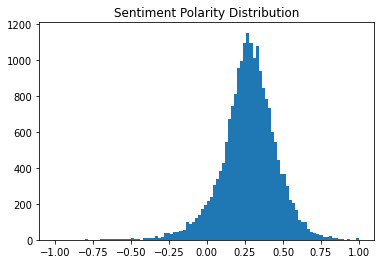

In [ ]:
# Sentiment Polarity
plt.hist(df['Sentiment Polarity'],bins = 100)
plt.title('Sentiment Polarity Distribution')
plt.show()

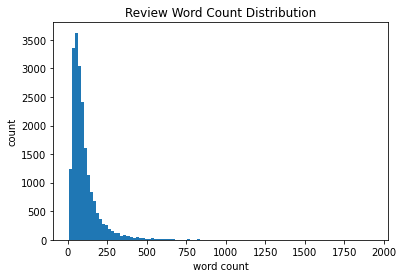

In [ ]:
# Word count of review
plt.hist(df['Word Count'],bins = 100)
plt.title('Review Word Count Distribution')
plt.ylabel('count')
plt.xlabel('word count')
plt.show()

## Data Pre-processing



* Lowering the case 
* Tokenization of the review
* Lemmatization of the words in the review

In [ ]:
def clean_text(text):
  text=re.sub("[^a-zA-z]"," ",text) # if expression in the sentence is not a word then this code change them to space
  text=text.lower() # turns all word in the sentence into lowercase.
  text=nltk.word_tokenize(text) # splits the words that are in the sentence from each other.
  lemma=WordNetLemmatizer()
  text=[lemma.lemmatize(word) for word in text] # this code finds the root of the word for a word in the sentence and change them to their root form.
  text=[t for t in text if len(t) > 1] 
  text=" ".join(text)
  return(text)


In [ ]:
df["review_clean"] = df["Review"].apply(lambda x: clean_text(x))

In [ ]:
df[['Review','review_clean']].head(10)

,Review,review_clean
0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,nice room not experience hotel monaco seattle ...
3,"unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...
5,love monaco staff husband stayed hotel crazy w...,love monaco staff husband stayed hotel crazy w...
6,"cozy stay rainy city, husband spent 7 nights m...",cozy stay rainy city husband spent night monac...
7,"excellent staff, housekeeping quality hotel ch...",excellent staff housekeeping quality hotel cho...
8,"hotel stayed hotel monaco cruise, rooms genero...",hotel stayed hotel monaco cruise room generous...
9,excellent stayed hotel monaco past w/e delight...,excellent stayed hotel monaco past delight rec...


## Frequency of top 25 most frequent words.

In [ ]:
freq = pd.DataFrame(pd.Series(' '.join(df['review_clean']).split()).value_counts()[:25])

In [ ]:
freq=freq.reset_index()

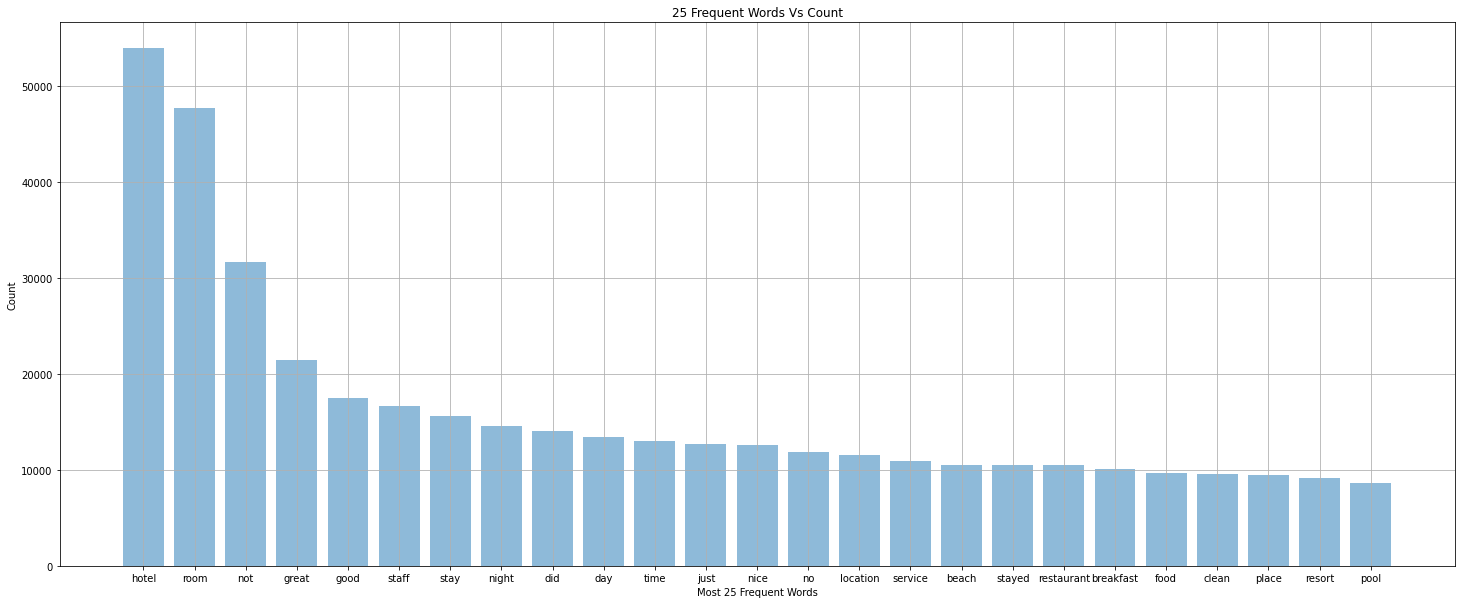

In [ ]:
plt.figure(figsize=(25,10))
plt.grid(True)
plt.bar(freq['index'], freq[0], align='center', alpha=0.5)
plt.ylabel('Count')
plt.xlabel('Most 25 Frequent Words')
plt.title('25 Frequent Words Vs Count')
plt.rcParams.update({'font.size': 11})
plt.show()

## Least 25 Words used in Review

In [ ]:
freq = pd.DataFrame(pd.Series(' '.join(df['review_clean']).split()).value_counts()).tail(25)

In [ ]:
freq=freq.reset_index()

In [ ]:
freq

,index,0
0,pennisula,1
1,fara,1
2,technican,1
3,purell,1
4,kearney,1
5,dynamo,1
6,lindor,1
7,condohotel,1
8,rosti,1
9,mangalar,1


## Feature Generation

In [ ]:
# Convert the text into Tfidf vector form with max features as 7000 and appending bigrams and trigrams.
stopword = stopwords.words('english') 
vectorizer = TfidfVectorizer(max_features=7000,sublinear_tf=True,norm='l2',ngram_range=(1,3),analyzer="word", stop_words= stopword)
X = vectorizer.fit_transform(df["review_clean"])

In [ ]:
# convert the vector object to dataframe and append the column names with features.
columns = vectorizer.get_feature_names()
df_features = pd.DataFrame(X.toarray())
df_features.columns = columns
print(df_features.shape)

(20491, 7000)


In [ ]:
df_features.head(5)

,__,___,aaa,abc,able,able check,able use,able walk,absolute,absolutely,absolutely amazing,absolutely beautiful,absolutely fantastic,absolutely gorgeous,absolutely loved,absolutely wonderful,abundance,abundant,ac,accademia,accept,acceptable,accepted,access,access internet,access lobby,access room,accessible,accommodate,accommodating,accommodation,accomodate,accomodating,accomodation,accomodations,accompanied,according,account,accross,accurate,...,write,write home,write review,writing,written,wrong,wrote,wyndham,xmas,yard,yeah,year,year ago,year eve,year hotel,year old,year old daughter,year old son,year stayed,yelling,yellow,yes,yes room,yesterday,yoghurt,yogurt,york,york city,you__,young,young child,young lady,younger,yr,yr old,yummy,yunque,zero,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069256,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081986,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.099274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model 

### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset to train and test with test size 20%. 
X_train,X_test,y_train,y_test = train_test_split(df_features, df['Sentiment'],test_size = 0.2,random_state=21,stratify=df['Sentiment'])


In [ ]:
# Multinomial Logistic regression model
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg',C=0.6,
                                         class_weight="balanced", fit_intercept=False,
                                         max_iter=250, penalty='l2',tol=0.0001).fit(X_train,y_train)

In [ ]:
# cross validation score
#scores = cross_val_score(mul_lr, X_train, y_train, cv=3)
#scores

array([0.81881406, 0.80948023, 0.82887994])

In [ ]:
#test the model to predict the test set.
pred = mul_lr.predict(X_test)

#Calculating predicted probability for calculating log_loss
y_pred_prob = mul_lr.predict_proba(X_test)


# determine the accuracy
metrics.accuracy_score(y_test,pred)

0.822883630153696

In [ ]:
y_pred_prob = mul_lr.predict_proba(X_test)
from sklearn.metrics import log_loss
log_loss(y_test,y_pred_prob,labels=[-1,0,1])  #expected closer to 0 for lower uncertainty in model

0.4851247800258657

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[ 509,  113,   21],
       [  98,  242,   97],
       [  78,  319, 2622]])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,pred,average = 'macro')
precision_recall_fscore_support(y_test,pred,average = 'micro')
precision_recall_fscore_support(y_test,pred,average = 'weighted')

(0.8596440490166248, 0.822883630153696, 0.8373514330421533, None)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


print("Accuracy:  ",+metrics.accuracy_score(y_test,pred))
#print(classification_report(y_test, pred))
print("Precision: ",+precision_score(y_test, pred, average='weighted'))
print("Recall:    ",+recall_score(y_test, pred, average='weighted'))
print("F1_Score:  ",+f1_score(y_test, pred, average='weighted'))
print("Log_Loss:  ",+log_loss(y_test,y_pred_prob,labels=[-1,0,1]))
					

Accuracy:   0.822883630153696
Precision:  0.8596440490166248
Recall:     0.822883630153696
F1_Score:   0.8373514330421533
Log_Loss:   0.4851247800258657


### Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb2=BernoulliNB()

nb_model=nb.fit(X_train,y_train)
nb2_model=nb2.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred=nb_model.predict(X_test)
y_pred2=nb2_model.predict(X_test)
y_pred_prob = nb2.predict_proba(X_test)


print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred,average="micro"))
print("---------------------------------------------------------------------------------")
print("Accuracy_NB2:",accuracy_score(y_test, y_pred2))
print("Precision_NB2:",precision_score(y_test, y_pred2,average="micro"))

Accuracy: 0.6711393022688461
Precision: 0.6711393022688461
---------------------------------------------------------------------------------
Accuracy_NB2: 0.7743352037082215
Precision_NB2: 0.7743352037082215


In [ ]:
y_pred_prob = nb.predict_proba(X_test)
print("Log_Loss:  ",+log_loss(y_test,y_pred_prob,labels=[-1,0,1]))

Log_Loss:   11.242016682648686


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


print("Accuracy:  ",+metrics.accuracy_score(y_test,y_pred2))
#print(classification_report(y_test, pred))
print("Precision: ",+precision_score(y_test, y_pred2, average='weighted'))
print("Recall:    ",+recall_score(y_test, y_pred2, average='weighted'))
print("F1_Score:  ",+f1_score(y_test, y_pred2, average='weighted'))
print("Log_Loss:  ",+log_loss(y_test,y_pred_prob,labels=[-1,0,1]))

Accuracy:   0.7743352037082215
Precision:  0.8013224908501241
Recall:     0.7743352037082215
F1_Score:   0.7864286111661247
Log_Loss:   2.395646124901503


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred= model_rf.predict(X_test)
y_pred_prob = model_rf.predict_proba(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average="micro"))

Accuracy: 0.8148328860697731
Precision: 0.8148328860697731


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


print("Accuracy:  ",+metrics.accuracy_score(y_test,y_pred))
#print(classification_report(y_test, pred))
print("Precision: ",+precision_score(y_test, y_pred, average='weighted'))
print("Recall:    ",+recall_score(y_test, y_pred, average='weighted'))
print("F1_Score:  ",+f1_score(y_test, y_pred, average='weighted'))
print("Log_Loss:  ",+log_loss(y_test,y_pred_prob,labels=[-1,0,1]))

Accuracy:   0.8148328860697731
Precision:  0.8385611169354166
Recall:     0.8148328860697731
F1_Score:   0.7610480265342843
Log_Loss:   0.5082570870441949
